### Projeto Prático - *Reconhecimento de Dígitos*

Alunos:
- Júlia Moraes da Silva 20230014434
- Luiz Eduardo de Almeida Siqueira Silva 20230014210

#### Importando as bibliotecas

In [26]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample
import matplotlib.pyplot as plt
import pandas as pd
import csv

#### Explicação do Dataset

Cada imagem é composta por 28 linhas e 28 colunas em um total de 784 pixels. Os dados de entrada (treino) possuem 785 colunas, a primeira coluna é chamada "label", identificando o dígito desenhado pelo usuário. O resto das colunas contém os valores de pixels da imagem associada. Cada coluna de pixel nos dados de treino, é nomeada "pixelx" onde x é um inteiro no intervalo [0,783]. Para localizar este pixel na imagem, x foi decomposto como x = i * 28 + j. Onde i e j são inteiros no intervalo [0,27]. 

Vamos inicar importando os csv.

#### Redução da dimensão das amostras 

In [27]:
treino = pd.read_csv('train.csv', sep=';')  
matriz_treino = treino.values


teste = pd.read_csv('test.csv', sep=';')
matriz_teste = teste.values

In [33]:

def acessar_imagem(dataset, indice):
    """
    Acessa uma imagem do dataset e retorna a imagem 28x28 e o label.
    
    Args:
        dataset (numpy.ndarray): O dataset contendo imagens e labels.
        indice (int): O índice da imagem a ser acessada.
    Returns:
        tuple: Uma tupla contendo a imagem 28x28 e o label (ou None se não houver label).
    """

    # Verificar se temos dados válidos
    if dataset.shape[1] >= 785:
    # Dataset com label
        label = dataset[indice, 0] 
        pixels = dataset[indice, 1:785] 
    
        #  Só faz reshape se temos 784 pixels
        if len(pixels) == 784:
            imagem_28x28 = pixels.reshape(28, 28)
        else:
            print(f"ERRO: {len(pixels)} pixels encontrados, esperado 784")
        
    elif dataset.shape[1] == 784:
    # Dataset só com pixels
        pixels = dataset[indice]
        label = None
    
    #print(f"Dataset label : {label}")
    #print(f"Pixels: {len(pixels)}")
    
    imagem_28x28 = pixels.reshape(28, 28)

    return imagem_28x28, label
    

In [34]:
def visualizar_imagem(imagem_28x28, label):
    """
    Visualiza uma imagem 28x28
    
    Parâmetros:
    - imagem_28x28: matriz 28x28 com os pixels da imagem
    - label: o dígito da imagem 
    
    
    Retorna:
    - imagem plotada com título indicando o dígito (ou 'Imagem do Dataset' se label for None)
    """
    
    if imagem_28x28.shape != (28, 28):
        print(f"ERRO: Formato incorreto {imagem_28x28.shape}. Esperado (28, 28)")
        return None
    
    # Criar título da imagem
    if label is not None:
        titulo = f'Dígito: {label}'
    else:
        titulo = 'Imagem do Dataset'
    
    # Plotar a imagem
    plt.figure(figsize=(6, 6))
    plt.imshow(imagem_28x28, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()
    
    

In [35]:
def intensidade_imagem(imagem):
    """
    Calcula a intensidade de preto de uma imagem.

    l =  ∑ (i=0 até 783)(pixel_i)/255
    
    Parâmetros:
    - imagem: matriz 28x28 com os valores dos pixels
    
    Retorna:
    - intensidade: aproximação da quantidade de pixels pretos na imagem 
    """

    intensidade =  np.sum(imagem)/255
     
    return intensidade
    

In [36]:
def simetria_imagem(imagem):
    """
    Calcula a simetria de uma imagem.

    s_v =  ∑ (i=0 até 27)(j=0 até 13) || pixel_ij - pixel_i(27-j) ||/255

    s_h = ∑ (i=0 até 13)(j=0 até 27) || pixel_ij - pixel_(27-i)j ||/255

    s = s_v + s_h

    Parâmetros:
    - imagem: matriz 28x28 com os valores dos pixels
    
    Retorna:
    - simetria: medida de simetria da imagem 
    """
    s_v = 0
    s_h = 0
    simetria = 0
    for i in range(28):
        for j in range(14):
            s_v += np.abs(imagem[i, j] - imagem[i, 27 - j])

    s_v /= 255

    for i in range(14):
        for j in range(28):
            s_h += np.abs(imagem[i, j] - imagem[27 - i, j])

    s_h /= 255

    simetria = s_v + s_h
    
    return simetria


In [37]:
def informs (dataset, indice):
    """
    Função para extrair informações de uma imagem em um conjunto de dados.
    
    """
    info = []
    
    imagem, label = acessar_imagem(dataset, indice)
    info.append(label)
    intensidade = intensidade_imagem(imagem)
    info.append(intensidade)
    simetria = simetria_imagem(imagem)
    info.append(simetria)
        
    return info


Criando os arquivos com a redução das dimensões das amostras. O primeiro elemento será o label, seguido pela intensidade e pela simetria. Fizemos isso tanto para treino como para teste.

In [38]:
for i in range(len(matriz_treino)):
    dados = informs(matriz_treino, i)
    with open("train_redu.csv", mode="a", newline="", encoding="utf-8") as arquivo:
        escritor = csv.writer(arquivo, delimiter=";")  # separador ;
        escritor.writerow(dados)

In [39]:
for i in range(len(matriz_teste)):
    dados = informs(matriz_teste, i)
    with open("test_redu.csv", mode="a", newline="", encoding="utf-8") as arquivo:
        escritor = csv.writer(arquivo, delimiter=";")  # separador ;
        escritor.writerow(dados)

#### Classificação dos dígitos 1 x 5 

Separando em treino e em teste apenas as imagens com 1 e 5.

In [21]:

# Carregar os dados (ajuste o caminho do arquivo)
df_train_redu = pd.read_csv('train_redu.csv', sep=';', header=None, 
                 names=['label', 'intensidade', 'simetricidade'])

# Filtrar apenas as linhas com label 1 ou 5
df_train_1x5 = df_train_redu[df_train_redu['label'].isin([1, 5])]

df_train_1x5.shape

(1184, 3)

In [22]:
# Carregar os dados (ajuste o caminho do arquivo)
df_test_redu = pd.read_csv('test_redu.csv', sep=';', header=None, 
                 names=['label', 'intensidade', 'simetricidade'])

# Filtrar apenas as linhas com label 1 ou 5
df_test_1x5 = df_test_redu[df_test_redu['label'].isin([1, 5])]

df_test_1x5.shape

(583, 3)

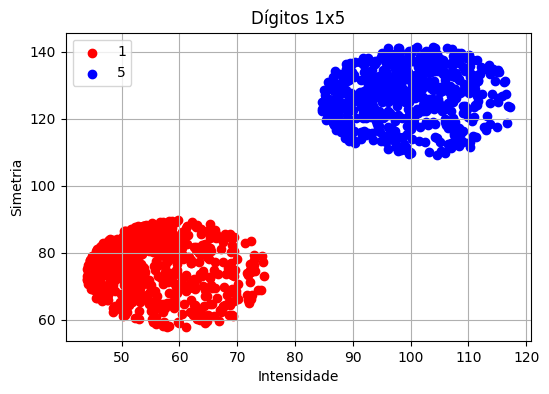

In [25]:
train_1 = df_train_1x5[df_train_1x5['label'] == 1]
train_5 = df_train_1x5[df_train_1x5['label'] == 5]


plt.figure(figsize=(6, 4))

plt.scatter(train_1['intensidade'], train_1['simetricidade'], c='red', label='1')
plt.scatter(train_5['intensidade'], train_5['simetricidade'], c='blue', label='5')

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Dígitos 1x5')
plt.legend()
plt.grid(True)
plt.show()